In [36]:
### If save data:
save_data = True

if save_data:
  def ensure_dir(file_path):
    import os
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

  from google.colab import drive
  drive.mount('/content/drive')
  %cd drive/My Drive/
  save_dir = "Figs/"
  ensure_dir(save_dir)

Mounted at /content/drive
/content/drive/My Drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import os

dir_mnist_theory = os.path.join(os.getcwd(),'MNIST_GaussRBF_theory.npz')
dir_mnist_exp = os.path.join(os.getcwd(),'MNIST_GaussRBF_exp.npz')
dir_cifar_theory = os.path.join(os.getcwd(),'CIFAR_GaussRBF_theory.npz')
dir_cifar_exp = os.path.join(os.getcwd(),'CIFAR_GaussRBF_exp.npz')

url_1 = "https://raw.github.com/Pehlevan-Group/kernel-generalization/main/PrecomputedData/RealDataGaussianRBF/MNIST_GaussRBF_theory.npz"
url_2 = "https://raw.github.com/Pehlevan-Group/kernel-generalization/main/PrecomputedData/RealDataGaussianRBF/MNIST_GaussRBF_exp.npz"
url_3 = "https://raw.github.com/Pehlevan-Group/kernel-generalization/main/PrecomputedData/RealDataGaussianRBF/CIFAR_GaussRBF_theory.npz"
url_4 = "https://raw.github.com/Pehlevan-Group/kernel-generalization/main/PrecomputedData/RealDataGaussianRBF/CIFAR_GaussRBF_exp.npz"

urllib.request.urlretrieve(url_1, dir_mnist_theory)
urllib.request.urlretrieve(url_2, dir_mnist_exp)
urllib.request.urlretrieve(url_3, dir_cifar_theory)
urllib.request.urlretrieve(url_4, dir_cifar_exp)

('/content/CIFAR_GaussRBF_exp.npz',
 <http.client.HTTPMessage at 0x7f3c11f077b8>)

# MNIST NeurIPS Results

In [4]:
error_theory_mnist = np.load(dir_mnist_theory, allow_pickle = True)
error_exp_ker_mnist = np.load(dir_mnist_exp)

ptheory_mnist, spectrum_mnist, weights_mnist, all_errs_mnist, train_errs_mnist, params_mnist = [error_theory_mnist['arr_'+str(i)] for i in range(len(error_theory_mnist.files))]
pvals_mnist, errs_ker_mnist, stds_ker_mnist = [error_exp_ker_mnist['arr_'+str(i)] for i in range(len(error_exp_ker_mnist.files))]
params_mnist = params_mnist.tolist()
print(params_mnist)

ker_var_mnist = params_mnist['ker_var']
lamb_mnist = params_mnist['lamb']
noise_std_mnist = params_mnist['noise_std']
num_repeats_mnist = params_mnist['num_repeats']

{'dataset_name': 'MNIST', 'test_size': 10000, 'subset_size': 10000, 'batch_size': 1000, 'num_repeats': 10, 'noise_std': array([0.        , 0.70710677, 1.2247449 ], dtype=float32), 'ker_var': [0.1, 0.5], 'lamb': [0.01, 0.08, 0.5]}


ker_var:  0.1  lamb:  0.01


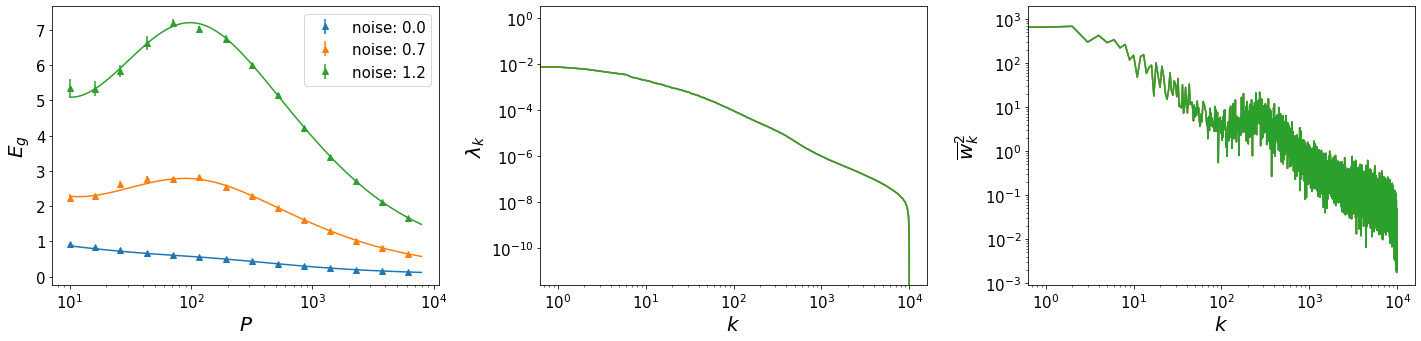

In [14]:
plt.rcParams.update({'font.size': 15})
fig, [ax1, ax2, ax3] = plt.subplots(1, 3)

fig.set_size_inches(20,5)

reg_idx = 0
ker_idx = 0
noise_idx = 2
print('ker_var: ', ker_var_mnist[ker_idx], ' lamb: ', lamb_mnist[reg_idx])
for var in noise_std_mnist:
  k = np.where(noise_std_mnist==var)[0][0] # noise_idx # 
  i = ker_idx
  j = reg_idx # lamb.index(var) #

  theory = all_errs_mnist[i,j,k]#/all_errs[i,j,k,0]
  train = train_errs_mnist[i,j,k]#/train_errs[i,j,k,0]
  exp = errs_ker_mnist[i,j,k][:-1]#/errs_ker[i,j,k][0]
  std = stds_ker_mnist[i,j,k][:-1]/np.sqrt(num_repeats_mnist)#/errs_ker[i,j,k][0]

  ax1.plot(ptheory_mnist, theory, color = 'C%d' % (k))
  ax1.errorbar(pvals_mnist[:-1], exp, std, fmt='^', color = 'C%d' % (k), label = 'noise: %0.1f' %(noise_std_mnist[k]))
  ax1.set_xlabel(r'$P$', fontsize=20)
  ax1.set_ylabel(r'$E_g$', fontsize=20)
  ax1.set_xscale('log')
  #ax1.set_yscale('log')
  ax1.legend()

  ax2.loglog(spectrum_mnist[ker_idx])
  ax2.set_ylabel(r'$\lambda_k$', fontsize=20)
  ax2.set_xlabel(r'$k$', fontsize=20)

  ax3.loglog(weights_mnist[ker_idx])
  ax3.set_xlabel(r'$k$', fontsize=20)
  ax3.set_ylabel(r'$\overline{w}_k^2$', fontsize=20)


plt.tight_layout()
plt.show()

# CIFAR10 RBF Examples NeurIPS

In [16]:
error_theory_cifar = np.load(dir_cifar_theory, allow_pickle = True)
error_exp_ker_cifar = np.load(dir_cifar_exp)

ptheory_cifar, spectrum_cifar, weights_cifar, all_errs_cifar, train_errs_cifar, params_cifar= [error_theory_cifar['arr_'+str(i)] for i in range(len(error_theory_cifar.files))]
pvals_cifar, errs_ker_cifar, stds_ker_cifar = [error_exp_ker_cifar['arr_'+str(i)] for i in range(len(error_exp_ker_cifar.files))]
params_cifar = params_cifar.tolist()
print(params_cifar)

ker_var_cifar = params_cifar['ker_var']
lamb_cifar = params_cifar['lamb']
noise_std_cifar = params_cifar['noise_std']
num_repeats_cifar = params_cifar['num_repeats']

{'dataset_name': 'CIFAR10', 'test_size': 10000, 'subset_size': 10000, 'batch_size': 1000, 'num_repeats': 10, 'noise_std': array([0.        , 0.70710677, 1.2247449 ], dtype=float32), 'ker_var': [0.1, 0.5], 'lamb': [0.01, 0.08, 0.5]}


ker_var:  0.1  lamb:  0.01


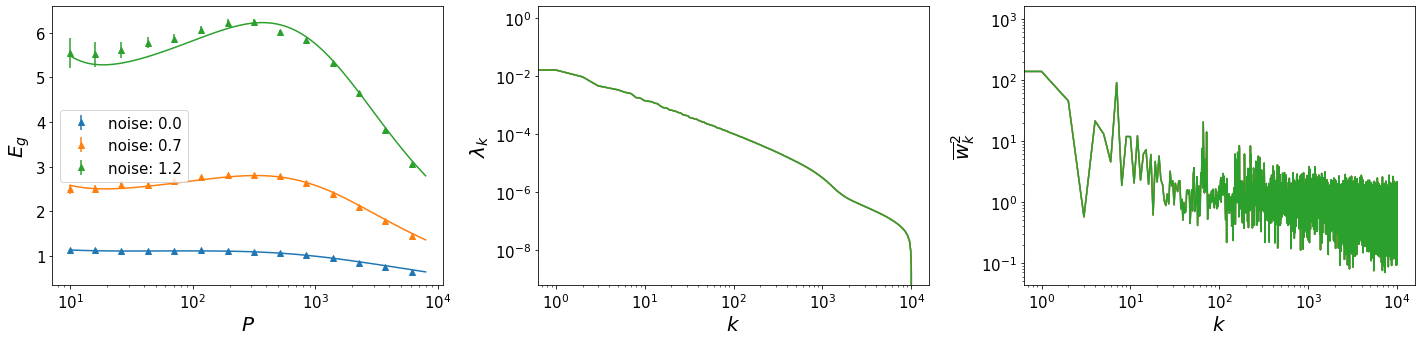

In [17]:
plt.rcParams.update({'font.size': 15})
fig, [ax1, ax2, ax3] = plt.subplots(1, 3)

fig.set_size_inches(20,5)

reg_idx = 0
ker_idx = 0
noise_idx = 2
print('ker_var: ', ker_var_cifar[ker_idx], ' lamb: ', lamb_cifar[reg_idx])
for var in noise_std_cifar:
  k = np.where(noise_std_cifar==var)[0][0] # noise_idx # 
  i = ker_idx
  j = reg_idx # lamb.index(var) #

  theory = all_errs_cifar[i,j,k]#/all_errs[i,j,k,0]
  train = train_errs_cifar[i,j,k]#/train_errs[i,j,k,0]
  exp = errs_ker_cifar[i,j,k][:-1]#/errs_ker[i,j,k][0]
  std = stds_ker_cifar[i,j,k][:-1]/np.sqrt(num_repeats_cifar)#/errs_ker[i,j,k][0]

  ax1.plot(ptheory_cifar, theory, color = 'C%d' % (k))
  ax1.errorbar(pvals_cifar[:-1], exp, std, fmt='^', color = 'C%d' % (k), label = 'noise: %0.1f' %(noise_std_cifar[k]))
  ax1.set_xlabel(r'$P$', fontsize=20)
  ax1.set_ylabel(r'$E_g$', fontsize=20)
  ax1.set_xscale('log')
  #ax1.set_yscale('log')
  ax1.legend()

  ax2.loglog(spectrum_cifar[ker_idx])
  ax2.set_ylabel(r'$\lambda_k$', fontsize=20)
  ax2.set_xlabel(r'$k$', fontsize=20)

  ax3.loglog(weights_cifar[ker_idx])
  ax3.set_xlabel(r'$k$', fontsize=20)
  ax3.set_ylabel(r'$\overline{w}_k^2$', fontsize=20)

plt.tight_layout()
plt.show()

In [18]:
params_cifar, params_mnist

({'batch_size': 1000,
  'dataset_name': 'CIFAR10',
  'ker_var': [0.1, 0.5],
  'lamb': [0.01, 0.08, 0.5],
  'noise_std': array([0.        , 0.70710677, 1.2247449 ], dtype=float32),
  'num_repeats': 10,
  'subset_size': 10000,
  'test_size': 10000},
 {'batch_size': 1000,
  'dataset_name': 'MNIST',
  'ker_var': [0.1, 0.5],
  'lamb': [0.01, 0.08, 0.5],
  'noise_std': array([0.        , 0.70710677, 1.2247449 ], dtype=float32),
  'num_repeats': 10,
  'subset_size': 10000,
  'test_size': 10000})

In [24]:
error_std = True
if error_std: num_repeats_mnist = 1
if error_std: num_repeats_cifar = 1

ker_var:  0.1  lamb:  0.01  noise:  1.2247449
ker_var:  0.1  lamb:  0.01  noise:  1.2247449


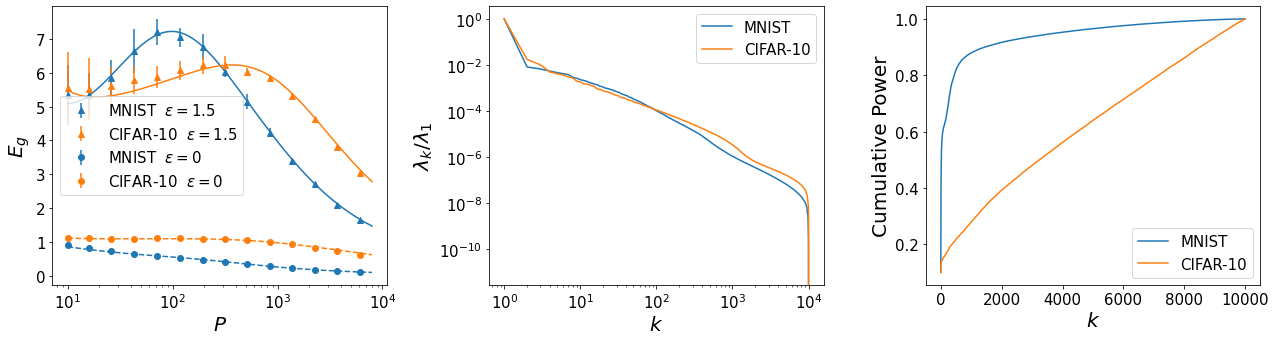

In [25]:
plt.rcParams.update({'font.size': 15})
fig, [ax1, ax2, ax3] = plt.subplots(1, 3)

fig.set_size_inches(18,5)

i = ker_idx = 0
j = reg_idx = 0
k = noise_idx = 2
print('ker_var: ', ker_var_mnist[ker_idx], ' lamb: ', lamb_mnist[reg_idx], ' noise: ', noise_std_mnist[noise_idx])
theory_mnist = all_errs_mnist[i,j,k]#/all_errs[i,j,k,0]
exp_mnist = errs_ker_mnist[i,j,k][:-1]#/errs_ker[i,j,k][0]
std_mnist= stds_ker_mnist[i,j,k][:-1]/np.sqrt(num_repeats_mnist)#/errs_ker[i,j,k][0]

theory_mnist_0 = all_errs_mnist[i,j,0]#/all_errs[i,j,k,0]
exp_mnist_0 = errs_ker_mnist[i,j,0][:-1]#/errs_ker[i,j,k][0]
std_mnist_0= stds_ker_mnist[i,j,0][:-1]/np.sqrt(num_repeats_mnist)#/errs_ker[i,j,k][0]

print('ker_var: ', ker_var_cifar[ker_idx], ' lamb: ', lamb_cifar[reg_idx], ' noise: ', noise_std_cifar[noise_idx])
theory_cifar = all_errs_cifar[i,j,k]#/all_errs[i,j,k,0]
exp_cifar = errs_ker_cifar[i,j,k][:-1]#/errs_ker[i,j,k][0]
std_cifar = stds_ker_cifar[i,j,k][:-1]/np.sqrt(num_repeats_cifar)#/errs_ker[i,j,k][0]

theory_cifar_0 = all_errs_cifar[i,j,0]#/all_errs[i,j,k,0]
exp_cifar_0 = errs_ker_cifar[i,j,0][:-1]#/errs_ker[i,j,k][0]
std_cifar_0 = stds_ker_cifar[i,j,0][:-1]/np.sqrt(num_repeats_cifar)#/errs_ker[i,j,k][0]

ax1.plot(ptheory_mnist, theory_mnist, color = 'C%d' % (0))
ax1.plot(ptheory_cifar, theory_cifar, color = 'C%d' % (1))
ax1.errorbar(pvals_mnist[:-1], exp_mnist, std_mnist, fmt='^', color = 'C%d' % (0), label = 'MNIST  $\epsilon = 1.5$')
ax1.errorbar(pvals_cifar[:-1], exp_cifar, std_cifar, fmt='^', color = 'C%d' % (1), label = 'CIFAR-10  $\epsilon = 1.5$')

ax1.plot(ptheory_mnist, theory_mnist_0, '--', color = 'C%d' % (0))
ax1.plot(ptheory_cifar, theory_cifar_0, '--', color = 'C%d' % (1))
ax1.errorbar(pvals_mnist[:-1], exp_mnist_0, std_mnist_0, fmt='o', color = 'C%d' % (0), label = 'MNIST  $\epsilon = 0$')
ax1.errorbar(pvals_cifar[:-1], exp_cifar_0, std_cifar_0, fmt='o', color = 'C%d' % (1), label = 'CIFAR-10  $\epsilon = 0$')

ax1.set_xlabel(r'$P$', fontsize=20)
ax1.set_ylabel(r'$E_g$', fontsize=20)
ax1.set_xscale('log')
#ax1.set_yscale('log')
ax1.legend()

k = np.linspace(1,len(spectrum_cifar[ker_idx]),len(spectrum_cifar[ker_idx]))
ax2.loglog(k,spectrum_mnist[ker_idx]/spectrum_mnist[ker_idx][0], label = 'MNIST')
ax2.loglog(k,spectrum_cifar[ker_idx]/spectrum_cifar[ker_idx][0], label = 'CIFAR-10')
ax2.set_ylabel(r'$\lambda_k/\lambda_1$', fontsize=20)
ax2.set_xlabel(r'$k$', fontsize=20)
ax2.legend()

ax3.plot(np.cumsum(weights_mnist[ker_idx])/1e+4, label = 'MNIST')
ax3.plot(np.cumsum(weights_cifar[ker_idx])/1e+4, label = 'CIFAR-10')
ax3.set_xlabel(r'$k$', fontsize=20)
ax3.set_ylabel(r'Cumulative Power', fontsize=20)
#ax3.set_xscale('log')
ax3.legend()

plt.tight_layout()
plt.show()

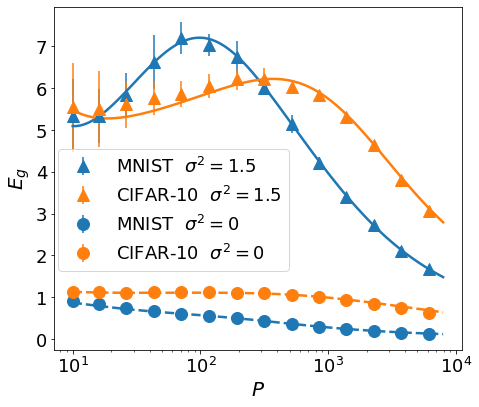

In [37]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(7,6))

plt.plot(ptheory_mnist, theory_mnist, color = 'C%d' % (0),  linewidth=2.5)
plt.plot(ptheory_cifar, theory_cifar, color = 'C%d' % (1),  linewidth=2.5)
plt.errorbar(pvals_mnist[:-1], exp_mnist, std_mnist, fmt='^',
             color = 'C%d' % (0), label = 'MNIST  $\sigma^2 = 1.5$', markersize = 12)
plt.errorbar(pvals_cifar[:-1], exp_cifar, std_cifar, fmt='^',
             color = 'C%d' % (1), label = 'CIFAR-10  $\sigma^2 = 1.5$', markersize = 12)

plt.plot(ptheory_mnist, theory_mnist_0, '--', color = 'C%d' % (0), linewidth=2.5)
plt.plot(ptheory_cifar, theory_cifar_0, '--', color = 'C%d' % (1), linewidth=2.5)
plt.errorbar(pvals_mnist[:-1], exp_mnist_0, std_mnist_0, fmt='o',
             color = 'C%d' % (0), label = 'MNIST  $\sigma^2 = 0$', markersize = 12)
plt.errorbar(pvals_cifar[:-1], exp_cifar_0, std_cifar_0, fmt='o',
             color = 'C%d' % (1), label = 'CIFAR-10  $\sigma^2 = 0$', markersize = 12)

plt.xlabel(r'$P$', fontsize=20)
plt.ylabel(r'$E_g$', fontsize=20)
plt.xscale('log')
#ax1.set_yscale('log')
plt.legend(loc=(0.01,0.23))

plt.tight_layout()
if save_data:
  filename = save_dir + 'CIFAR10vsMNIST_RBF_DoubleDescent_var-%0.1f_lamb-%0.2f.pdf' %(ker_var_cifar[i], lamb_cifar[j])
  plt.savefig(filename, bbox_inches = 'tight')
plt.show()

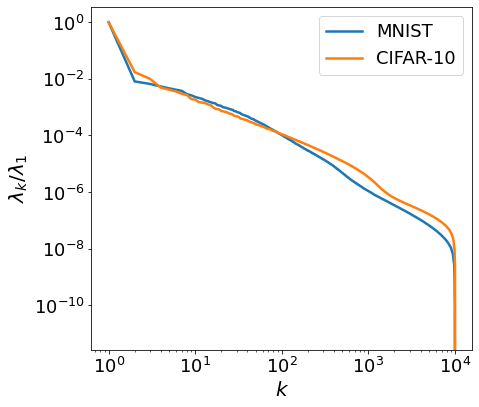

In [38]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(7,6))

k = np.linspace(1,len(spectrum_cifar[ker_idx]),len(spectrum_cifar[ker_idx]))
plt.loglog(k,spectrum_mnist[ker_idx]/spectrum_mnist[ker_idx][0], label = 'MNIST', linewidth=2.5)
plt.loglog(k,spectrum_cifar[ker_idx]/spectrum_cifar[ker_idx][0], label = 'CIFAR-10', linewidth=2.5)
plt.ylabel(r'$\lambda_k/\lambda_1$', fontsize=20)
plt.xlabel(r'$k$', fontsize=20)
plt.legend()

plt.tight_layout()
if save_data:
  filename = save_dir + 'CIFAR10vsMNIST_RBF_Spectrum_var-%0.1f_lamb-%0.2f.pdf' %(ker_var_cifar[i], lamb_cifar[j])
  plt.savefig(filename, bbox_inches = 'tight')
plt.show()

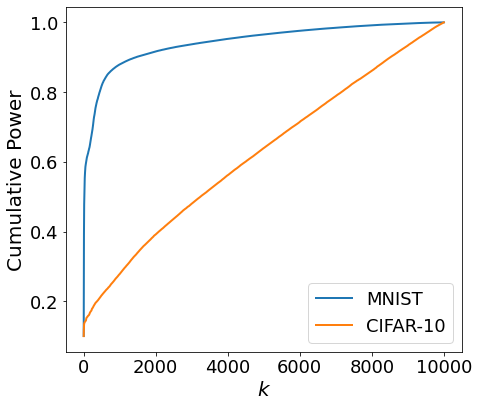

In [39]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(7,6))

plt.plot(np.cumsum(weights_mnist[ker_idx])/1e+4, label = 'MNIST', linewidth=2)
plt.plot(np.cumsum(weights_cifar[ker_idx])/1e+4, label = 'CIFAR-10', linewidth=2)
plt.xlabel(r'$k$', fontsize=20)
plt.ylabel(r'Cumulative Power', fontsize=20)
#ax3.set_xscale('log')
plt.legend()

plt.tight_layout()
if save_data:
  filename = save_dir + 'CIFAR10vsMNIST_RBF_Weigths_var-%0.1f_lamb-%0.2f.pdf' %(ker_var_cifar[i], lamb_cifar[j])
  plt.savefig(filename, bbox_inches = 'tight')
plt.show()